In [1]:
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from util.twix import *
from util.fft import *
from util.entropy import *
import util.simulator as simulate
from util.rank import *
from util.phantom import * 
from tqdm.notebook import tqdm
from util.simulator import * 

In [2]:
file_sms = "../lib/resource/XA31A/meas_MID00310_FID03272_zimu_B0_DF75_Mono_GRAPPA0_EPI.dat"
file = readtwix(file_sms)
FIGSIZE = (10,6)
pha = file[0]['readouts']
phaflag=file[0]['flags']
data = file[1]['readouts']
dataflag = file[1]['flags']
print(data.shape)

Software version: VD/VE (!?)

Scan  0
100 % parsed in 1 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 0 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/215 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/2 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   SB_EPI_NAV
1   DATA
(48, 128, 30)


In [4]:
recon = epi_phasecorrection_lowrank(data, 20)

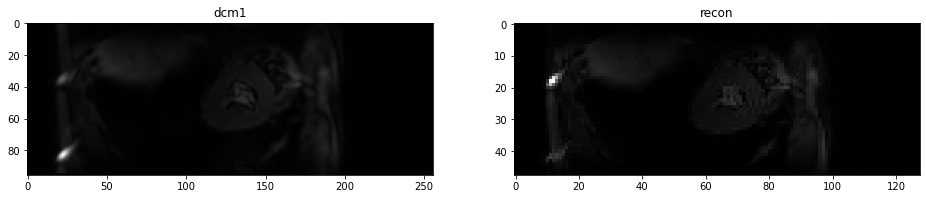

In [5]:
import pydicom as dicom
image_path = '../lib/resource/XA31A/IM-0005-0001.dcm'
ds = dicom.dcmread(image_path)
truth = ds.pixel_array
plt.figure(figsize =(16,12))
plt.subplot(1,2,1) 
plt.title("dcm1")
plt.imshow(np.flip(truth[::-1],1), cmap ="gray")
plt.subplot(1,2,2)
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="gray")

/var/folders/5d/6p36mvb505x5j7b_90jtxdsr0000gn/T/ipykernel_1572/2918666523.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.flip(truth[::-1],1)), cmap ="gray")


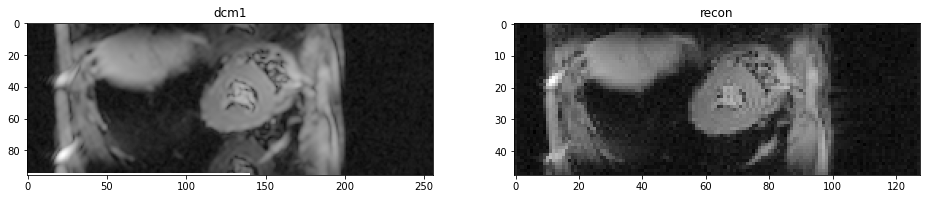

In [6]:
plt.figure(figsize =(16,12))
plt.subplot(1,2,1)
plt.title("dcm1")
plt.imshow(np.log(np.flip(truth[::-1],1)), cmap ="gray")
plt.subplot(1,2,2)
plt.title("recon")
plt.imshow(np.log(np.abs(rsos(ifft2c(recon)))), cmap ="gray")